Computer Vision Object Dectection
Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.
네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [113]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.
matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [114]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [115]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [116]:
subscription_key = 'b5afe0ad10154483a9585e04f8556fc7'
vision_base_url = 'https://labuser66computervision.cognitiveservices.azure.com/vision/v2.0/'

In [117]:
analyze_url = vision_base_url + 'analyze'

분석에 사용되는 이미지를 확인합니다.

In [118]:
image_url = 'https://www.foodbank.co.kr/news/photo/202001/59116_15732_1028.jpg'

In [119]:
con = requests.get(image_url).content
byte = BytesIO(con)
image = Image.open(byte)
#.image = Image.open(BytesIO(requests.get(image_url).content))

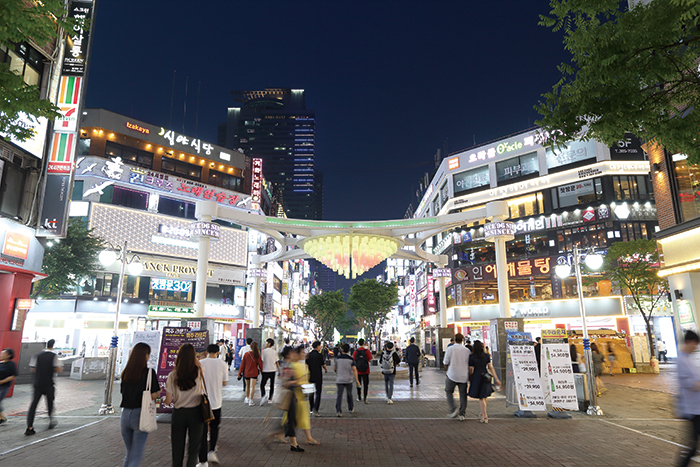

In [120]:
image

In [121]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [122]:
response = requests.post(analyze_url, headers = headers, params = params, json = data) #get or post

In [123]:
result = response.json()

In [124]:
result

{'categories': [{'name': 'building_',
   'score': 0.375,
   'detail': {'landmarks': []}},
  {'name': 'outdoor_', 'score': 0.05078125, 'detail': {'landmarks': []}},
  {'name': 'outdoor_street', 'score': 0.21875, 'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['Grey', 'White'],
  'accentColor': '8F773C',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['outdoor',
   'building',
   'road',
   'bus',
   'people',
   'walking',
   'street',
   'city',
   'standing',
   'group',
   'sidewalk',
   'woman',
   'riding',
   'train',
   'large',
   'tall',
   'man',
   'many',
   'station',
   'stop',
   'parked',
   'clock',
   'holding'],
  'captions': [{'text': 'a group of people walking on a city street',
    'confidence': 0.9796040830669086}]},
 'requestId': '50487a4e-e1fc-4453-974d-6ea3d9966256',
 'metadata': {'height': 467, 'width': 700, 'format': 'Jpeg'}}

In [125]:
image_caption = result['description']['captions'][0]['text']

In [126]:
image_caption

'a group of people walking on a city street'

object Detection #사진안에서 내용범위 뽑아보기

In [127]:
objectDetection_url = vision_base_url + 'detect'

In [128]:
image_url = 'http://menu.mt.co.kr/moneyweek/thumb/2017/05/17/06/2017051709058028746_1.jpg' #이미지 url 가져오기

In [129]:
image = Image.open(BytesIO(requests.get(image_url).content))# 이미지 사진으로 보기

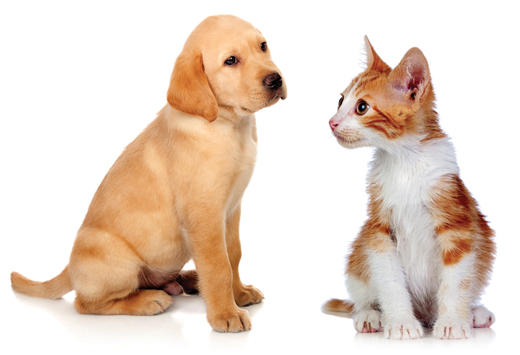

In [130]:
image #출력

In [131]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}
#제이슨 형식으로 정보 저장

In [132]:
response = requests.post(objectDetection_url, headers = headers, params = params, json = data) #get or post, 제이슨 형식 저장

In [133]:
result = response.json()
result #출력(상자모양)

{'objects': [{'rectangle': {'x': 10, 'y': 20, 'w': 280, 'h': 309},
   'object': 'golden retriever',
   'confidence': 0.517,
   'parent': {'object': 'retriever',
    'confidence': 0.905,
    'parent': {'object': 'dog',
     'confidence': 0.921,
     'parent': {'object': 'mammal',
      'confidence': 0.932,
      'parent': {'object': 'animal', 'confidence': 0.932}}}}},
  {'rectangle': {'x': 324, 'y': 30, 'w': 174, 'h': 318},
   'object': 'cat',
   'confidence': 0.716,
   'parent': {'object': 'mammal',
    'confidence': 0.889,
    'parent': {'object': 'animal', 'confidence': 0.89}}}],
 'requestId': '15e9f66d-60eb-43b3-9fd8-497aecbd87d5',
 'metadata': {'height': 355, 'width': 520, 'format': 'Jpeg'}}

In [134]:
from PIL import Image, ImageDraw, ImageFont #이미지, 이미지위 그림, 이미지 위 폰트

draw = ImageDraw.Draw(image)

In [135]:
# boundingBox를 위한 함수 
def DrawBox(detectData):
    objects = detectData['objects']

    for obj in objects:
        # print(obj)

        rect = obj['rectangle']
        print(rect)

        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']

        draw.rectangle(((x-5,y-5),(x+w,y+h)),outline='orange') #꼭지점 좌표

        objectName = obj['object']
        draw.text((x,y),objectName,fill='orange')

In [136]:
DrawBox(result)

{'x': 10, 'y': 20, 'w': 280, 'h': 309}
{'x': 324, 'y': 30, 'w': 174, 'h': 318}


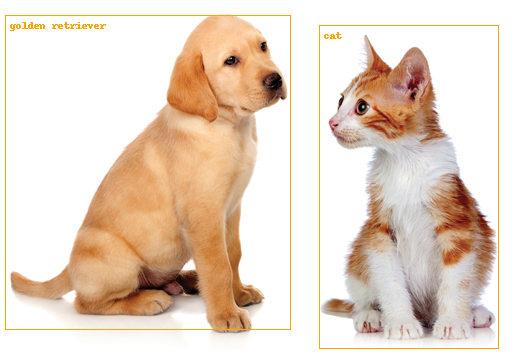

In [137]:
image